In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [2]:
import torch
print(torch.cuda.is_available())



True


In [3]:
(x_train,y_train),(x_test,y_test)= keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_test.shape

(10000,)

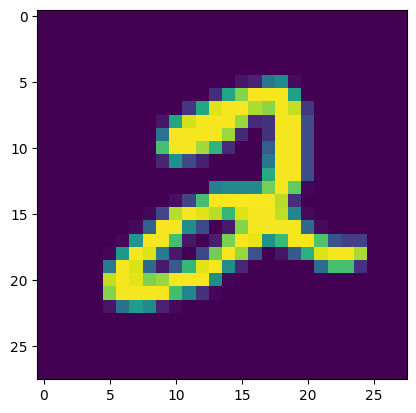

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])

In [8]:
x_train = x_train/255
x_test = x_test/255

In [11]:
model=Sequential()

In [12]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7929 - loss: 0.6802 - val_accuracy: 0.9529 - val_loss: 0.1551
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9383 - loss: 0.2098 - val_accuracy: 0.9619 - val_loss: 0.1198
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9524 - loss: 0.1635 - val_accuracy: 0.9669 - val_loss: 0.1141
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9614 - loss: 0.1290 - val_accuracy: 0.9715 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1125 - val_accuracy: 0.9730 - val_loss: 0.0930
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9708 - loss: 0.0967 - val_accuracy: 0.9743 - val_loss: 0.0898
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0904 - val_accuracy: 0.9759 - val_loss: 0.0856
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9729 - loss: 0.0877 - 

In [16]:
y_prob = model.predict(x_test)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
y_pred = y_prob.argmax(axis=1)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9758

In [19]:
history.history

{'accuracy': [0.8772708177566528,
  0.9415208101272583,
  0.952791690826416,
  0.9616041779518127,
  0.9651041626930237,
  0.9696458578109741,
  0.972000002861023,
  0.9735000133514404,
  0.9749791622161865,
  0.976729154586792],
 'loss': [0.4151248037815094,
  0.19945752620697021,
  0.15880998969078064,
  0.13095732033252716,
  0.11643673479557037,
  0.10272490233182907,
  0.09449586272239685,
  0.08642474561929703,
  0.0817648246884346,
  0.07734442502260208],
 'val_accuracy': [0.95291668176651,
  0.9619166851043701,
  0.9669166803359985,
  0.9714999794960022,
  0.9729999899864197,
  0.9742500185966492,
  0.9759166836738586,
  0.9749166369438171,
  0.9749166369438171,
  0.9757500290870667],
 'val_loss': [0.1550956666469574,
  0.1197531521320343,
  0.11406396329402924,
  0.09528236091136932,
  0.09299886971712112,
  0.08981473743915558,
  0.08557753264904022,
  0.08909726142883301,
  0.09312782436609268,
  0.09385479986667633]}

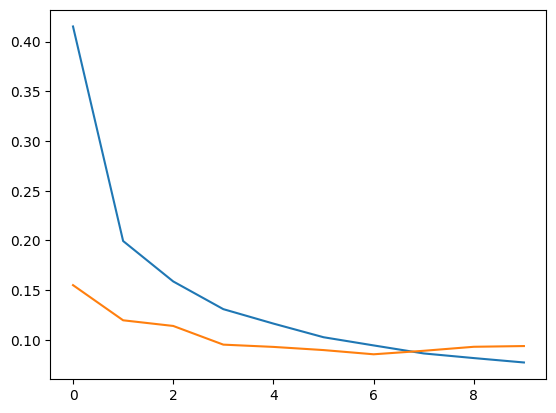

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

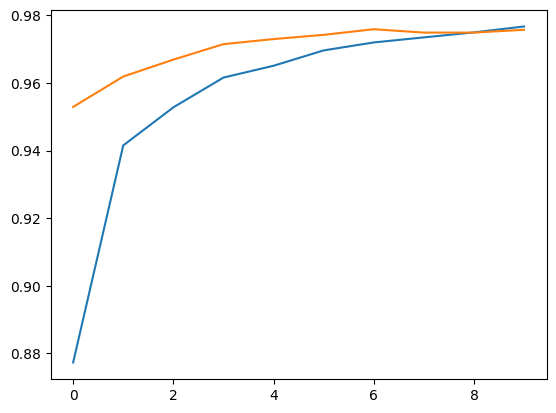

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

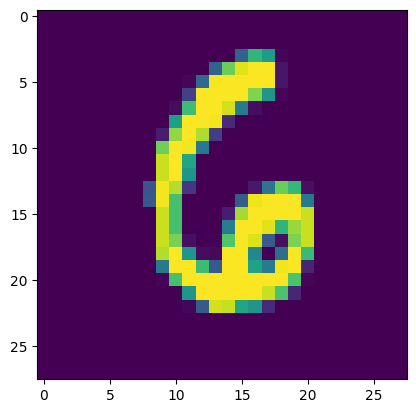

In [22]:
plt.imshow(x_test[81])

In [23]:
model.predict(x_test[81].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


array([6])

In [24]:
# Save the entire model (architecture + weights + optimizer) in modern Keras format
model.save('mnist_model.keras')


In [25]:
from google.colab import files

files.download('mnist_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>